## Data collection distribution

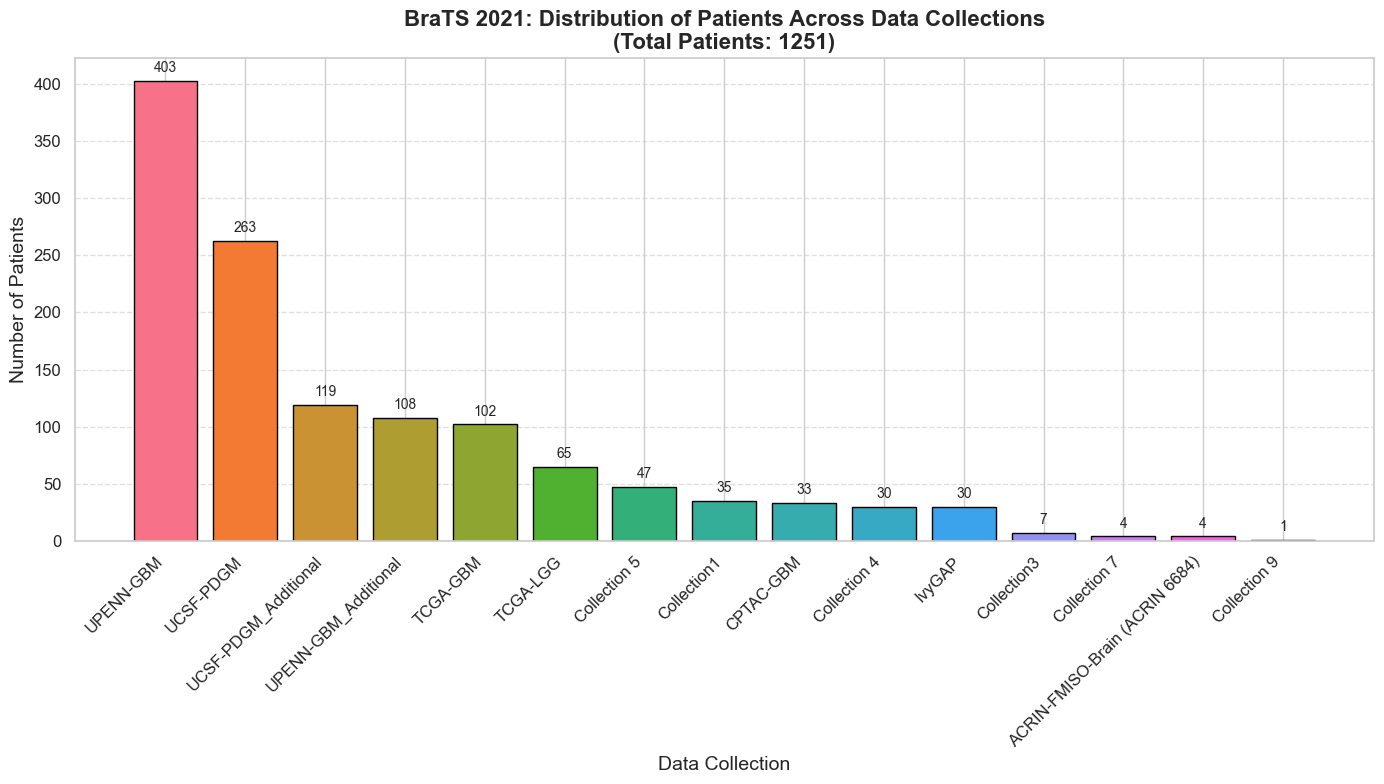

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
file_path = "./BraTS2021_MappingToTCIA.xlsx"
collection_data = pd.read_excel(file_path, sheet_name='TCIA')
collection_data = collection_data[collection_data['Segmentation (Task 1) Cohort'] == 'Training']

# Data preparation
collection_counts = collection_data['Data Collection (as on TCIA+additional)'].value_counts()
total_patients = collection_counts.sum()

# Generate random colors
np.random.seed(42)  # For reproducibility
random_colors = sns.color_palette("husl", len(collection_counts))  # Unique hues

# Plotting
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
bars = plt.bar(
    x=collection_counts.index,
    height=collection_counts.values,
    color=random_colors,
    edgecolor='black'
)

# Annotate bar values
for i, count in enumerate(collection_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)


# Title and labels
plt.title('BraTS 2021: Distribution of Patients Across Data Collections\n(Total Patients: 1251)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Data Collection', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

# Ticks customization
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adjust bar width for better readability
plt.gca().patch.set_alpha(0.8)

# Add lighter grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [6]:
import os
import nibabel as nib
import numpy as np
import pandas as pd

# Path to the data directory
base_path = r"\\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData"


# DataFrame to store results
results = []

# Iterate through each patient's folder
for patient_folder in os.listdir(base_path):
    patient_path = os.path.join(base_path, patient_folder)
    if os.path.isdir(patient_path):  # Ensure it's a directory
        seg_file = os.path.join(patient_path, f"{patient_folder}_seg.nii.gz")
        
        if os.path.exists(seg_file):  # Check if segmentation file exists
            # Load segmentation file
            seg_data = nib.load(seg_file).get_fdata()
            unique_values = np.unique(seg_data)
            print(f"Unique values in {seg_file}: {unique_values}")
            
            # Count voxels for each class
            ncr_count = np.sum(seg_data == 1)  # NCR
            ed_count = np.sum(seg_data == 2)   # ED
            et_count = np.sum(seg_data == 3)   # ET
            
            # Append results to the list
            results.append({
                "Patient": patient_folder,
                "NCR (necrotic core)": ncr_count,
                "ED (edema)": ed_count,
                "ET (enhancing tumor)": et_count
            })

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Save to CSV for reference
df_results.to_csv("class_distribution.csv", index=False)

# Display the first few rows
print(df_results.head())


Unique values in \\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData\BraTS2021_00402\BraTS2021_00402_seg.nii.gz: [0. 1. 2. 3.]
Unique values in \\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData\BraTS2021_01003\BraTS2021_01003_seg.nii.gz: [0. 1. 2. 3.]
Unique values in \\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData\BraTS2021_00757\BraTS2021_00757_seg.nii.gz: [0. 1. 2. 3.]
Unique values in \\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData\BraTS2021_01452\BraTS2021_01452_seg.nii.gz: [0. 1. 2. 3.]
Unique values in \\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData\BraTS2021_00601\BraTS2021_00601_seg.nii.gz: [0. 1. 2. 3.]
Unique values in \\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData\BraTS2021_00682\BraTS2021_00682_seg.nii.gz: [0. 1. 2. 3.]
Unique values in \\wsl.local

C:\Users\agata\AppData\Local\Temp\ipykernel_20456\2744155477.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_counts.index, y=total_counts.values, palette="husl")


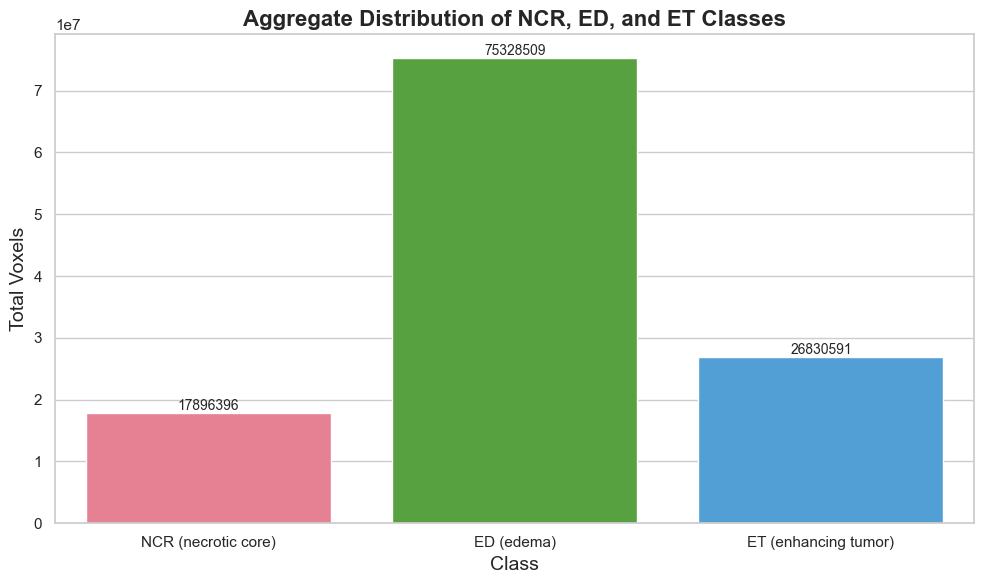

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate counts across all patients
total_counts = df_results[['NCR (necrotic core)', 'ED (edema)', 'ET (enhancing tumor)']].sum()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=total_counts.index, y=total_counts.values, palette="husl")

# Add annotations
for i, count in enumerate(total_counts.values):
    plt.text(i, count + 5000, str(count), ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title('Aggregate Distribution of NCR, ED, and ET Classes', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Total Voxels', fontsize=14)

plt.tight_layout()
plt.show()


C:\Users\agata\AppData\Local\Temp\ipykernel_20456\1519431045.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Voxel Count", data=df_melted, palette="husl")


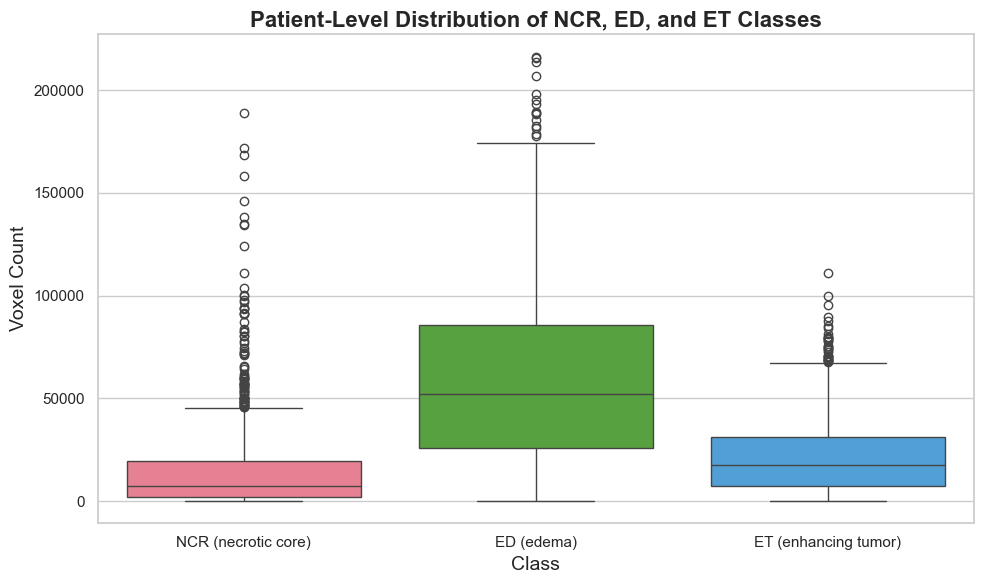

In [18]:
# Melt the DataFrame for seaborn boxplot
df_melted = df_results.melt(id_vars=["Patient"], 
                            value_vars=["NCR (necrotic core)", "ED (edema)", "ET (enhancing tumor)"],
                            var_name="Class", 
                            value_name="Voxel Count")

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Class", y="Voxel Count", data=df_melted, palette="husl")

# Title and labels
plt.title('Patient-Level Distribution of NCR, ED, and ET Classes', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Voxel Count', fontsize=14)

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

# Assuming `df_results` is the DataFrame created in your original script
# It contains columns: "Patient", "NCR (necrotic core)", "ED (edema)", "ET (enhancing tumor)"

# Filter patients with non-zero voxels for each class
counts = {
    "NCR (necrotic core)": (df_results["NCR (necrotic core)"] > 0).sum(),
    "ED (edema)": (df_results["ED (edema)"] > 0).sum(),
    "ET (enhancing tumor)": (df_results["ET (enhancing tumor)"] > 0).sum(),
}

# Create a summary table
summary_table = pd.DataFrame(list(counts.items()), columns=["Class", "Patient Count"])

# Display the summary table
print(summary_table)

# Save to CSV
summary_table.to_csv("patient_class_counts.csv", index=False)


                  Class  Patient Count
0   NCR (necrotic core)           1208
1            ED (edema)           1250
2  ET (enhancing tumor)           1218


In [6]:
import pandas as pd 

df_results = pd.read_csv("class_distribution.csv")

df_presence = pd.DataFrame(df_results["Patient"])

# Add columns to indicate presence (1) or absence (0) of each class
df_presence["NCR present"] = (df_results["NCR (necrotic core)"] > 0).astype(int)
df_presence["ED present"] = (df_results["ED (edema)"] > 0).astype(int)
df_presence["ET present"] = (df_results["ET (enhancing tumor)"] > 0).astype(int)


In [8]:
# Create a combined column to represent unique region combinations
df_presence["Region Combination"] = df_presence[["NCR present", "ED present", "ET present"]].astype(str).agg("-".join, axis=1)

# Save the sorted DataFrame to a CSV file
output_file_sorted = "brats2021_class_presence_all.csv"
df_presence.to_csv(output_file_sorted, index=False)

# Count the occurrences of each unique region combination
region_combination_counts = df_presence["Region Combination"].value_counts().reset_index()
region_combination_counts.columns = ["Region Combination", "Patient Count"]

# Save the summary to a CSV file
summary_file = "brats2021_region_combination_summary.csv"
region_combination_counts.to_csv(summary_file, index=False)

# Print the summary DataFrame
print(region_combination_counts)

  Region Combination  Patient Count
0              1-1-1           1180
1              0-1-1             37
2              1-1-0             27
3              0-1-0              6
4              1-0-1              1


image shape: (240, 240, 155), label shape: (240, 240, 155)


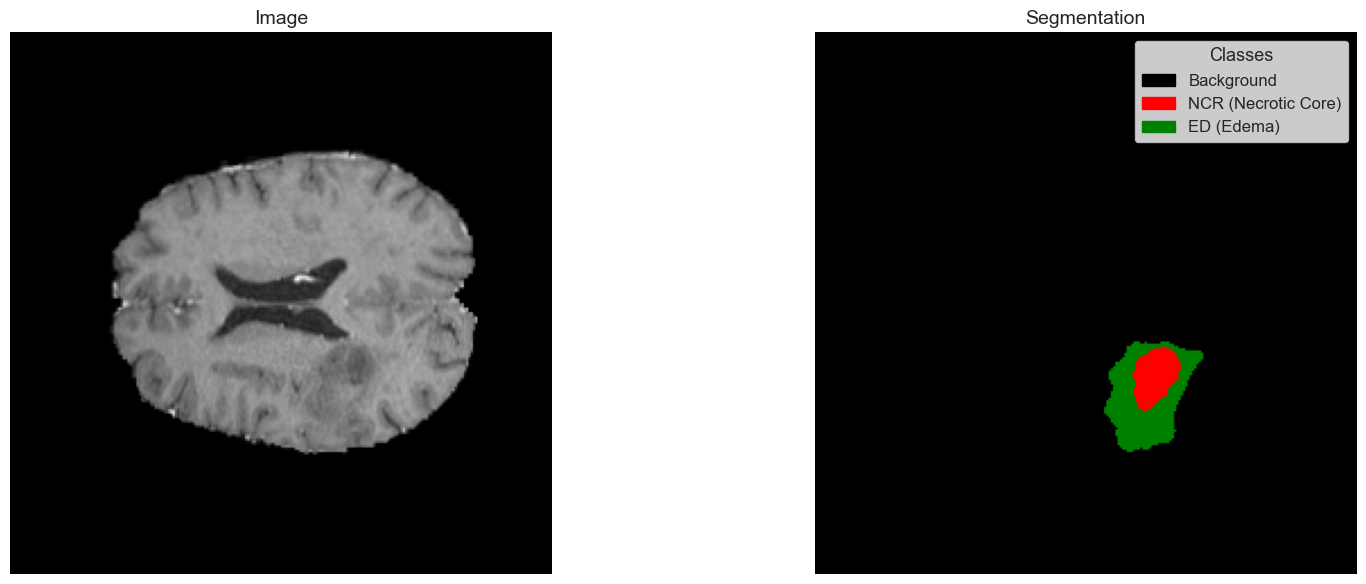

In [58]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

# Define file paths
data_dir = r"\\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge"
img_add = os.path.join(data_dir, "TrainingData/BraTS2021_01433/BraTS2021_01433_t1ce.nii.gz")
label_add = os.path.join(data_dir, "TrainingData/BraTS2021_01433/BraTS2021_01433_seg.nii.gz")

# Load image and label
img = nib.load(img_add).get_fdata()
label = nib.load(label_add).get_fdata()
print(f"image shape: {img.shape}, label shape: {label.shape}")

# Define label values and their meanings
legend_labels = {
    0: "Background",
    1: "NCR (Necrotic Core)",
    2: "ED (Edema)",
}

# Get unique values present in the label slice
unique_values = sorted(int(val) for val in set(label[:, :, 90].flatten()) if val in legend_labels)

# Create a colormap for visualization
colormap = ListedColormap(["black", "red", "green"])  # Adjusted to match label values

# Plot image and segmentation
plt.figure("image", (18, 6))
plt.subplot(1, 2, 1)
plt.title("Image", fontsize=14)
plt.imshow(img[:, :, 90], cmap="gray")
plt.axis("off")  # Remove gridlines

plt.subplot(1, 2, 2)
plt.title("Segmentation", fontsize=14)
plt.imshow(label[:, :, 90], cmap=colormap)
plt.axis("off")  # Remove gridlines

# Dynamically create the legend based on unique values in the segmentation image
legend_patches = [Patch(color=colormap(value), label=legend_labels[value]) for value in unique_values]
plt.legend(handles=legend_patches, loc="upper right", fontsize=12, title="Classes", title_fontsize=13)

plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.216844481320143].


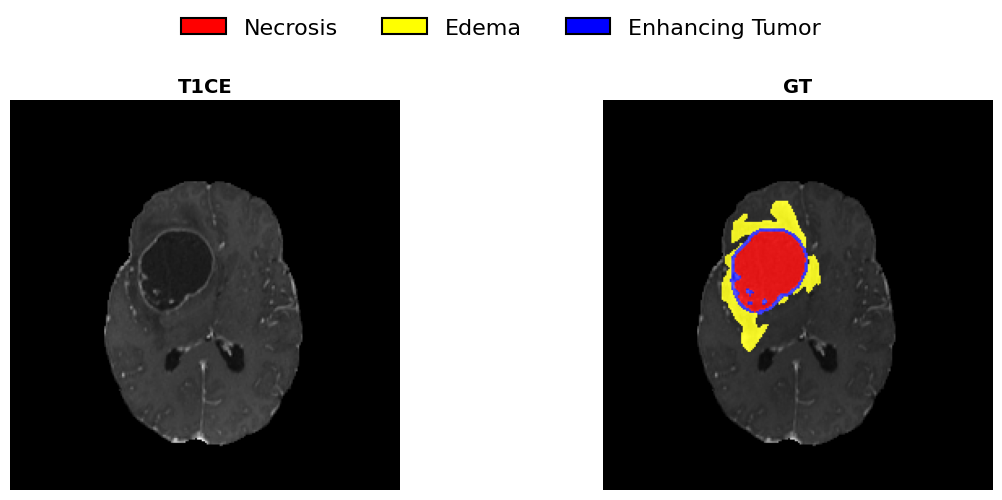

In [107]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os

# Load MRI modalities and segmentation data
def load_nifti(path):
    return nib.load(path).get_fdata()

def load_patient_data(data_path, part):
    participant_folder = os.path.join(data_path, part)
    modalities = os.listdir(participant_folder)
    paths = {
        "t1ce": os.path.join(participant_folder, [file for file in modalities if "t1ce" in file][0]),
        "seg": os.path.join(participant_folder, [file for file in modalities if "seg" in file][0]),
    }
    return {mod: load_nifti(path) for mod, path in paths.items()}

# Paths for data
data_path = r"\\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData"
hgg_part = "BraTS2021_01078"

# Load data for one patient
hgg_data = load_patient_data(data_path, hgg_part)

# Determine the middle slice
slice_index_hgg = hgg_data["t1ce"].shape[2] // 2

# Create the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Single row with 2 columns

# Segmentation colors
colors = {1: [1, 0, 0], 2: [1, 1, 0], 3: [0, 0, 1]}  # RGB values (red, yellow, blue)

# Create legend
legend_patches = [
    Patch(facecolor=np.array(color), edgecolor='black', linewidth=1.5, label=label)
    for label, color in zip(["Necrosis", "Edema", "Enhancing Tumor"], colors.values())
]

# HGG Raw Image with contrast enhancement
slice_data_hgg = hgg_data["t1ce"][:, :, slice_index_hgg].T
slice_data_hgg = (slice_data_hgg - np.min(slice_data_hgg)) / (np.max(slice_data_hgg) - np.min(slice_data_hgg))  # Normalize
ax[0].imshow(slice_data_hgg, cmap='gray')
ax[0].axis('off')
ax[0].set_title("T1CE", fontsize=14, weight='bold')

# HGG Overlay
segmentation_slice_hgg = hgg_data["seg"][:, :, slice_index_hgg].T
overlay_hgg = np.zeros(segmentation_slice_hgg.shape + (3,), dtype=np.float32)
for label, color in colors.items():
    overlay_hgg[segmentation_slice_hgg == label] = color

# Blend the segmentation mask with the image
blended_hgg = 0.8 * overlay_hgg + np.stack([slice_data_hgg]*3, axis=-1) * 0.8

ax[1].imshow(blended_hgg)
ax[1].axis('off')
ax[1].set_title("GT", fontsize=14, weight='bold')

# Add legend below the subplots
fig.legend(
    handles=legend_patches,
    loc='upper center',
    ncol=3,
    fontsize=16,
    frameon=False,
    bbox_to_anchor=(0.5, 1.02)
)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.2)  # Adjust top and bottom for title and legend
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.099999988079071].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.247656801345113].


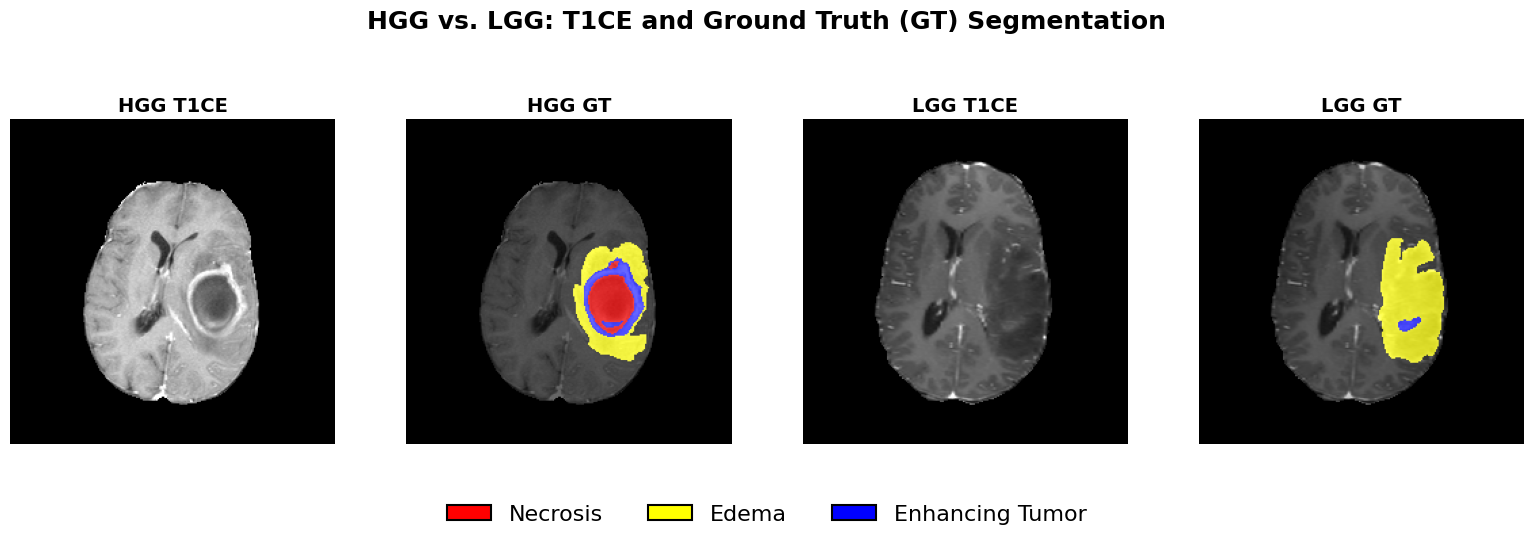

In [109]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os

# Load MRI modalities and segmentation data
def load_nifti(path):
    return nib.load(path).get_fdata()

def load_patient_data(data_path, part):
    participant_folder = os.path.join(data_path, part)
    modalities = os.listdir(participant_folder)
    paths = {
        "t1ce": os.path.join(participant_folder, [file for file in modalities if "t1ce" in file][0]),
        "seg": os.path.join(participant_folder, [file for file in modalities if "seg" in file][0]),
    }
    return {mod: load_nifti(path) for mod, path in paths.items()}

# Paths for data
data_path = r"\\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData"
hgg_part = "BraTS2021_01619"
lgg_part = "BraTS2021_00033"

# Load data for both patients
hgg_data = load_patient_data(data_path, hgg_part)
lgg_data = load_patient_data(data_path, lgg_part)

# Determine the middle slice
slice_index_hgg = hgg_data["t1ce"].shape[2] // 2
slice_index_lgg = 70

# Create the figure and axes
fig, ax = plt.subplots(1, 4, figsize=(16, 5))  # Adjusted figure size for a wide layout

# Segmentation colors
colors = {1: [1, 0, 0], 2: [1, 1, 0], 3: [0, 0, 1]}  # RGB values (red, yellow, blue)

# Create legend
legend_patches = [
    Patch(facecolor=np.array(color), edgecolor='black', linewidth=1.5, label=label)
    for label, color in zip(["Necrosis", "Edema", "Enhancing Tumor"], colors.values())
]

# Enhance brightness and contrast of HGG raw image
slice_data_hgg = hgg_data["t1ce"][:, :, slice_index_hgg].T
slice_data_hgg = (slice_data_hgg - np.min(slice_data_hgg)) / (np.max(slice_data_hgg) - np.min(slice_data_hgg))  # Normalize
slice_data_hgg = np.clip(slice_data_hgg * 1.5, 0, 1)  # Increase brightness

# HGG Raw Image
ax[0].imshow(slice_data_hgg, cmap='gray')
ax[0].axis('off')
ax[0].set_title("HGG T1CE", fontsize=14, weight='bold')

# HGG Overlay (Blend the segmentation with the image)
segmentation_slice_hgg = hgg_data["seg"][:, :, slice_index_hgg].T
overlay_hgg = np.zeros(segmentation_slice_hgg.shape + (3,), dtype=np.float32)
for label, color in colors.items():
    overlay_hgg[segmentation_slice_hgg == label] = color
blended_hgg = 0.7 * overlay_hgg + np.stack([slice_data_hgg] * 3, axis=-1) * 0.4  # Blend
ax[1].imshow(blended_hgg)
ax[1].axis('off')
ax[1].set_title("HGG GT", fontsize=14, weight='bold')

# Enhance brightness and contrast of LGG raw image
slice_data_lgg = lgg_data["t1ce"][:, :, slice_index_lgg].T
slice_data_lgg = (slice_data_lgg - np.min(slice_data_lgg)) / (np.max(slice_data_lgg) - np.min(slice_data_lgg))  # Normalize
slice_data_lgg = np.clip(slice_data_lgg * 1.5, 0, 1)  # Increase brightness

# LGG Raw Image
ax[2].imshow(slice_data_lgg, cmap='gray')
ax[2].axis('off')
ax[2].set_title("LGG T1CE", fontsize=14, weight='bold')

# LGG Overlay (Blend the segmentation with the image)
segmentation_slice_lgg = lgg_data["seg"][:, :, slice_index_lgg].T
overlay_lgg = np.zeros(segmentation_slice_lgg.shape + (3,), dtype=np.float32)
for label, color in colors.items():
    overlay_lgg[segmentation_slice_lgg == label] = color
blended_lgg = 0.7 * overlay_lgg + np.stack([slice_data_lgg] * 3, axis=-1) * 0.8  # Blend
ax[3].imshow(blended_lgg)
ax[3].axis('off')
ax[3].set_title("LGG GT", fontsize=14, weight='bold')

# Add legend below the figure
fig.legend(
    handles=legend_patches,
    loc='lower center',
    ncol=3,
    fontsize=16,
    frameon=False,
    bbox_to_anchor=(0.5, -0.05)
)

# Adjust layout
plt.tight_layout()
fig.suptitle("HGG vs. LGG: T1CE and Ground Truth (GT) Segmentation", fontsize=18, weight='bold', y=1.02)
plt.subplots_adjust(top=0.8, bottom=0.15)  # Leave space for the title and legend
plt.show()
